<a href="https://colab.research.google.com/github/viniciussz7/projeto_RegressaoLinear/blob/main/projeto_regressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear

## 📚 Importação das Bibliotecas

Primeiro, importamos todas as bibliotecas necessárias para nossa análise e visualização dos dados.

- **pandas 🐼**
- **matplotlib 🎨**
- **seaborn 📈**
- **scikit-learn 🛠️**
- **numpy 🔢**

In [25]:
# Instalação de pacotes necessários diretamente no ambiente do Colab
%pip install matplotlib scikit-learn pandas seaborn scipy

# Importação de bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report,mean_squared_error, r2_score, accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

sns.set(style='whitegrid')

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\vinic\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## 📁 Carregando Dataset

A base de dados utilizada no projeto é um dataset do Instagram que faz análise dos dados dos maiores influenciadores da plataforma.


Disponível no kaggle em:
[Top Instagram Influencers Data](https://www.kaggle.com/datasets/surajjha101/top-instagram-influencers-data-cleaned)

In [2]:
url = 'https://drive.usercontent.google.com/u/0/uc?id=1Dnf11YkRn5l9vQ8_AjA4ddFHnnaS--i_&export=download'
dataset = pd.read_csv(url)
dataset

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


### > Explicando as variáveis

- **rank**: Rank do influenciador com base na quantidade de seguidores.
- **channel_info**: Nome de usuário do influenciador no Instagram.
- **influence_score**: Pontuação de influência dos usuários, calculada com base em menções, importância e popularidade.
- **posts**: Número de postagens feitas até o momento.
- **followers**: Quantidade de seguidores do usuário.
- **avg_likes**: Média de curtidas nas postagens do influenciador (curtidas totais/postagens totais).
- **60_day_eng_rate**: Taxa de engajamento dos últimos 60 dias do influenciador, como fração do total de engajamentos feitos até agora.
- **new_post_avg_like**: Média de curtidas em novas postagens.
- **total_likes**: Total de curtidas que o usuário recebeu em suas postagens (em bilhões).
- **country**: País ou região de origem do usuário.



Nesse caso, a variável dependente é `influence_score`, ou seja, a variável que será predita a partir das demais variáveis independentes. Para entender a relação entre as variáveis, podemos calcular a matriz de correlação e a distruibuição da variável `influence_score` em relação as outras variáveis numéricas.



## 🛠️ Pré-processamento e Tratamento dos Dados


### ↔️ Ordem de escala


O dataset utilizado contém colunas que representam grandezas numéricas com sufixos indicando a ordem de magnitude ('k' para milhares, 'm' para milhões e 'b' para bilhões). Para realizar análises e cálculos precisos, é necessário converter esses valores em números reais, isso é crucial para garantir a consistência e a precisão das análises realizadas com o dataset. Ao eliminar os sufixos, os dados numéricos são padronizados, facilitando a comparação e a interpretação dos resultados.


Além disso, foram retiradas as colunas `channel_info` e `country` que são strings e não influenciam na variável alvo `influence_score`.

In [3]:
## Função para converter valores com sufixo 'k', 'm' ou 'b' para valores reais
def convert_to_real_value(value):

  if isinstance(value, str):
    if value.endswith('k'):
      return float(value[:-1]) * 1000
    elif value.endswith('m'):
      return float(value[:-1]) * 1000000
    elif value.endswith('b'):
      return float(value[:-1]) * 1000000000
    elif value.endswith('%'):
      return float(value[:-1]) * 0.01
  return value  # Retorna o valor original se não houver sufixo

In [4]:
# Lista das colunas que serão convertidas para valores reais
cols_to_convert = ['posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']

# Aplicando a função convert_to_real_value para as colunas selecionadas
for col in cols_to_convert:
  dataset[col] = dataset[col].apply(lambda x: convert_to_real_value(x))

# Retirando colunas de strings
dataset_no_str = dataset.drop(['channel_info', 'country'], axis=1)	

### ❌ Valores NaN

Dados que contém valores NaN impedem que alguns algoritmos de aprendizado de máquina funcionem corretamente, dessa forma foi feito um tratamento para corrigir os valores NaN.

**OBS:** Como havia apenas um NaN, foi feita a remoção da instância.

In [5]:
# Identificando colunas com valores NaN
nan_columns = dataset_no_str.columns[dataset_no_str.isna().any()].tolist()
print(f"Colunas com valores NaN: {nan_columns}")

# Mostrando quantas linhas possui valores NaN
count_nan_rows = dataset_no_str.isna().any(axis=1).sum()
print(f"Número de linhas com valores NaN: {count_nan_rows}")

# Removendo linha com valores NaN
dataset_no_str = dataset_no_str.dropna()
dataset_no_str

Colunas com valores NaN: ['60_day_eng_rate']
Número de linhas com valores NaN: 1


,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
0,1,92,3300.0,475800000.0,8700000.0,0.0139,6500000.0,2.900000e+10
1,2,91,6900.0,366200000.0,8300000.0,0.0162,5900000.0,5.740000e+10
2,3,90,890.0,357300000.0,6800000.0,0.0124,4400000.0,6.000000e+09
3,4,93,1800.0,342700000.0,6200000.0,0.0097,3300000.0,1.150000e+10
4,5,91,6800.0,334100000.0,1900000.0,0.0020,665300.0,1.250000e+10
...,...,...,...,...,...,...,...,...
195,196,71,2300.0,33200000.0,623800.0,0.0140,464700.0,1.400000e+09
196,197,81,3800.0,33200000.0,390400.0,0.0064,208000.0,1.500000e+09
197,198,79,770.0,33200000.0,193300.0,0.0026,82600.0,1.492000e+08
198,199,78,2300.0,33000000.0,719600.0,0.0142,467700.0,1.700000e+09


### ❌ Outliers

Uma forma de visualizar os outliers de cada variável é traçar o boxplot e verificar os pontos individuais que estão fora dos limites dos whiskers, linhas que se estendem da caixa e indicam a variabilidade dos dados fora do intervalo interquartil.

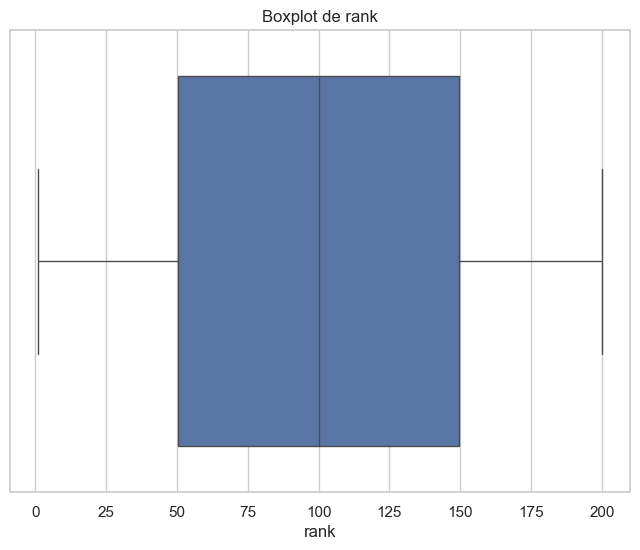

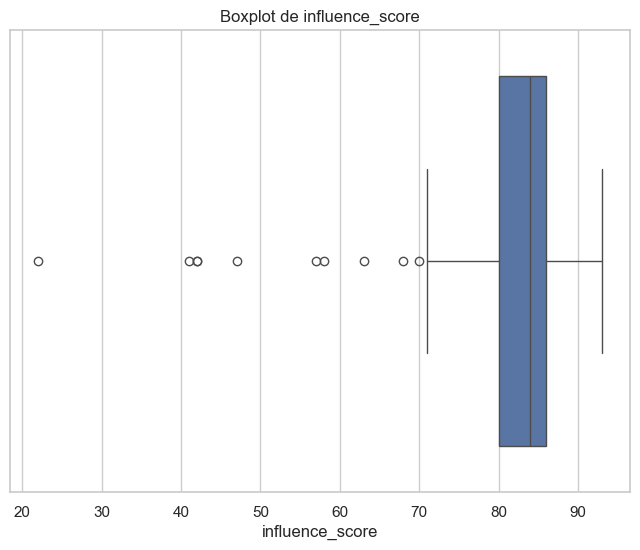

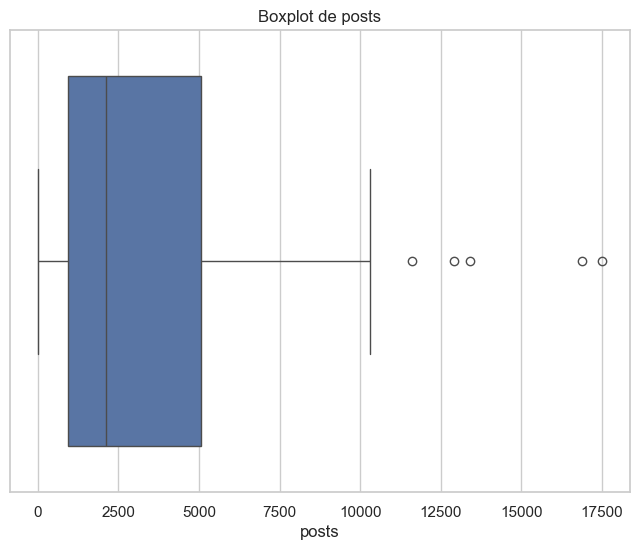

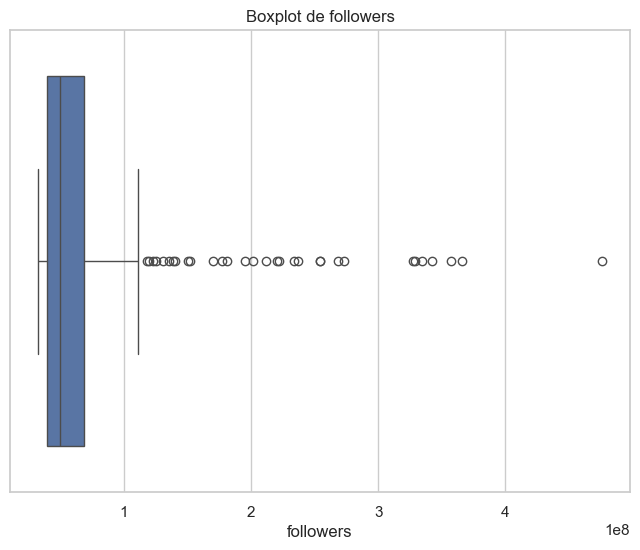

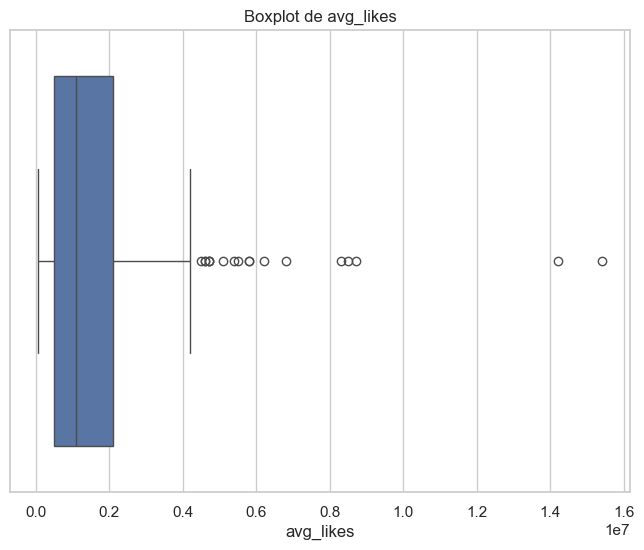

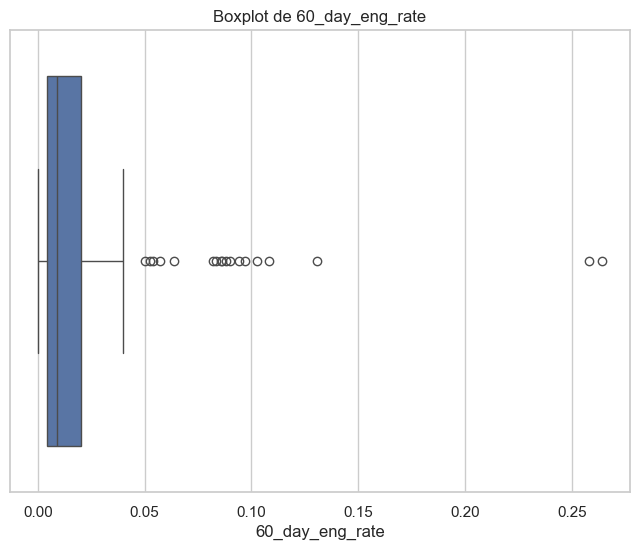

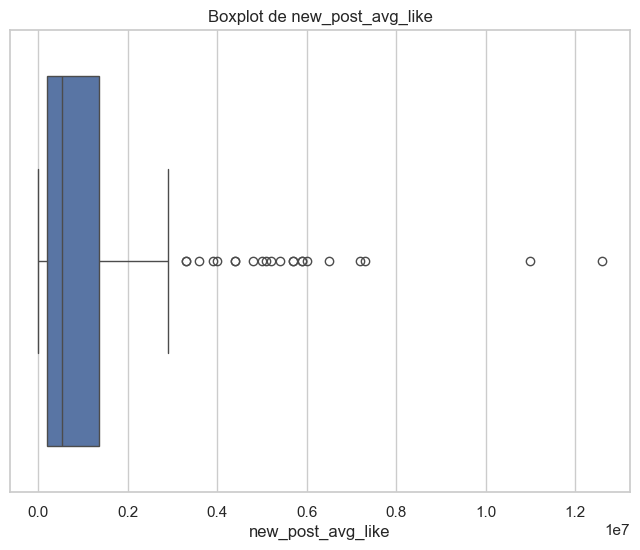

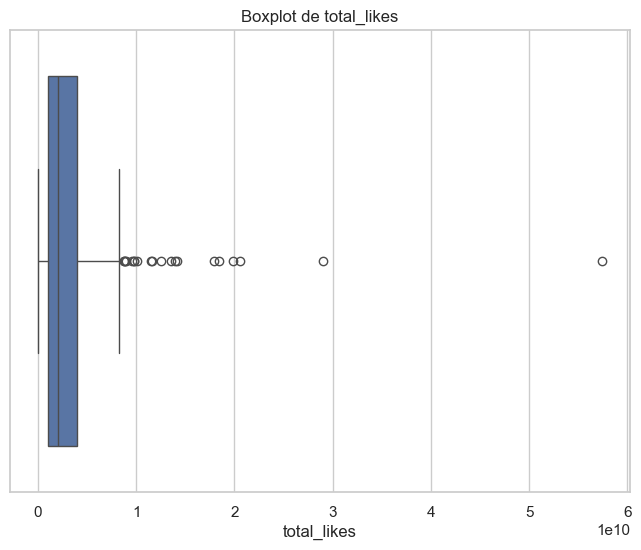

In [6]:
#Outliers
for column in dataset_no_str:
    plt.figure(figsize=(8, 6))  # Ajuste o tamanho da figura, se necessário
    sns.boxplot(x=dataset_no_str[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

In [7]:
# Funcao para encontrar os outliers
def encontrar_outliers_iqr(data):
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = data[(data < limite_inferior) | (data > limite_superior)]
    return outliers

# Encontre outliers em cada coluna
columns_outliers = []

for column in dataset_no_str.select_dtypes(include=np.number).columns:
    outliers = encontrar_outliers_iqr(dataset_no_str[column])
    if len(outliers) > 0:
        columns_outliers.append(column)

Como a Regressão Linear é sensível à outliers, foi feito um tratamento para corrigir seus efeitos. Como a base de dados é pequena e os outliers não são causados por erros na coleta, nem são valores extremos isolados não representativos, foi usado uma abordagem de **transformação (logarítmica)** para tratá-los, a fim de tornar a distruibuição mais simétrica.

In [8]:
# Aplicar a transformaçãoem cada coluna, exceto a coluna alvo
#for column in columns_outliers:
#    if column not in ['influence_score', 'rank']:
#        dataset_no_str[column] = np.sqrt(dataset_no_str[column])

#dataset_no_str

In [9]:
#Aplicar a transformação Box-Cox em cada coluna numérica, exceto 'influence_score' e 'rank'
for column in dataset_no_str.select_dtypes(include=np.number).columns:
    if column not in ['influence_score', 'rank']:
        # Lidar com valores 0 ou negativos adicionando uma constante
        dataset_no_str[column] = dataset_no_str[column] + 1  
        
        # Aplicar a transformação Box-Cox
        transformed_data, lambda_value = stats.boxcox(dataset_no_str[column])
        
        # Substituir a coluna original pelos dados transformados
        dataset_no_str[column] = transformed_data  
        
        print(f"Coluna '{column}': Lambda = {lambda_value}")

Coluna 'posts': Lambda = 0.2588571474906134
Coluna 'followers': Lambda = -1.255401469121771
Coluna 'avg_likes': Lambda = 0.055052595746398224
Coluna '60_day_eng_rate': Lambda = -43.85532023061875
Coluna 'total_likes': Lambda = 0.1467810694335813


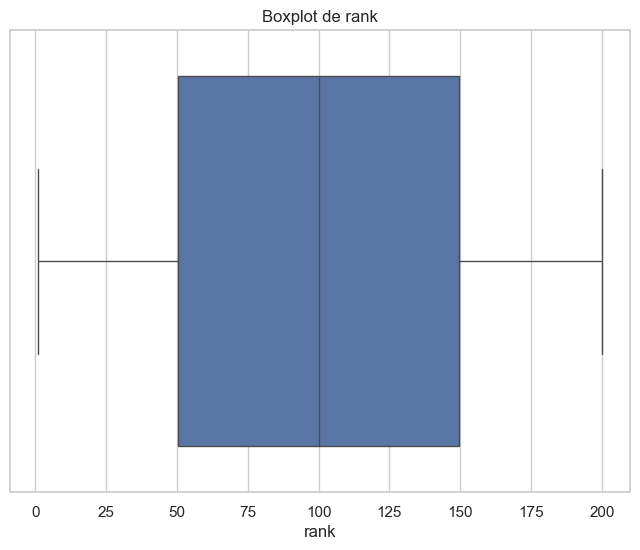

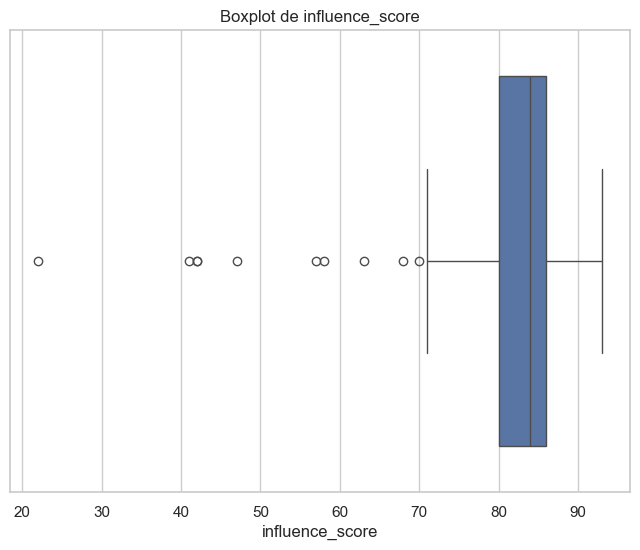

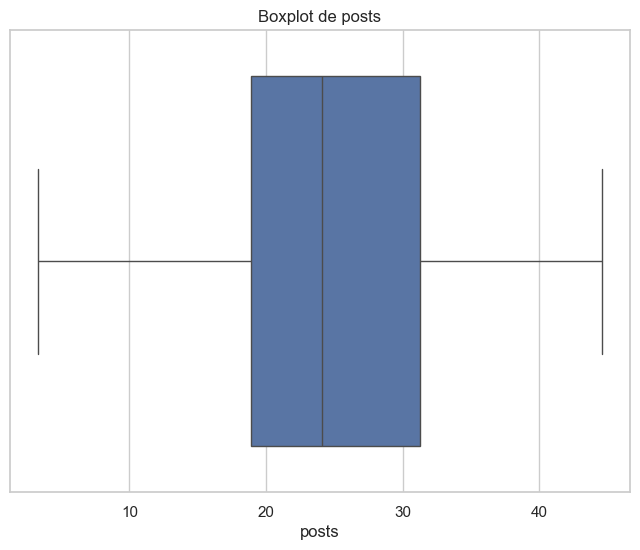

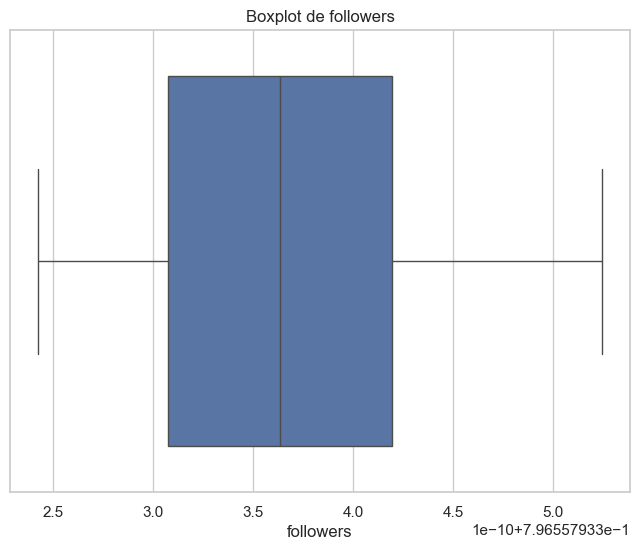

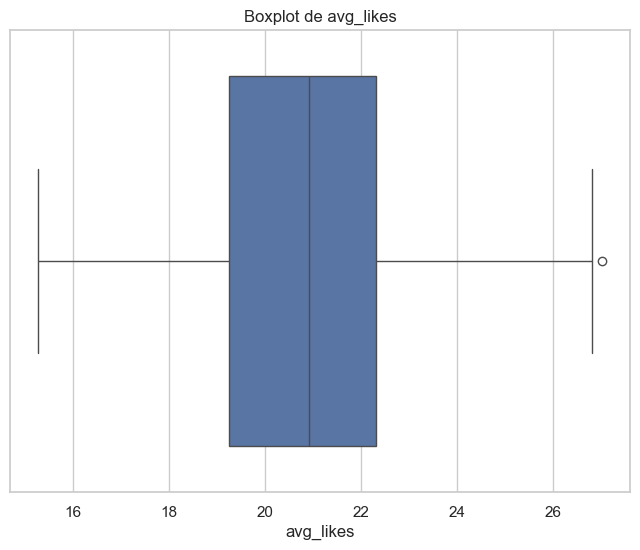

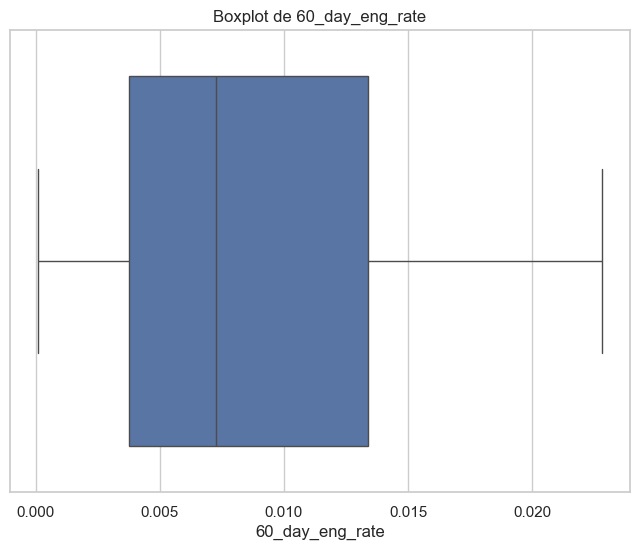

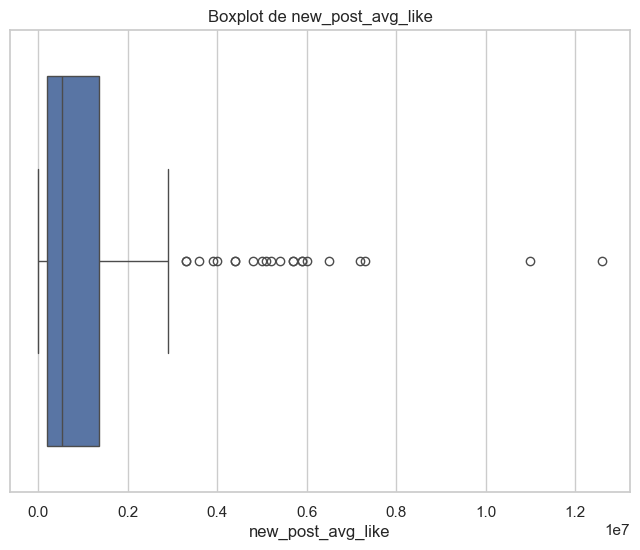

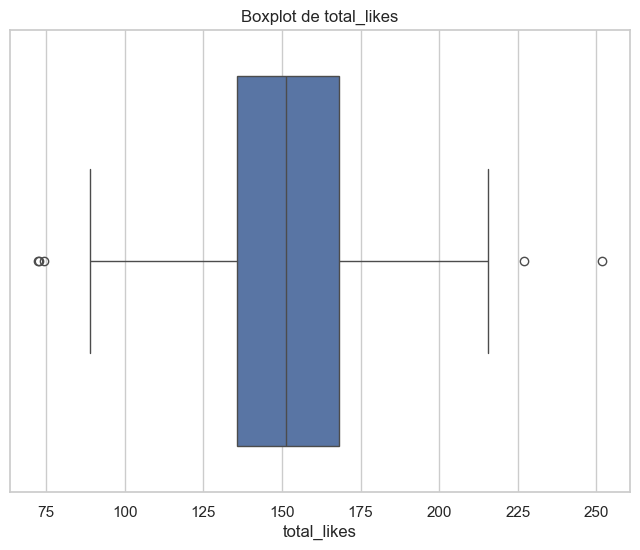

In [10]:
for column in dataset_no_str:
    plt.figure(figsize=(8, 6))  # Ajuste o tamanho da figura, se necessário
    sns.boxplot(x=dataset_no_str[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

## 📊 Visualização dos Dados


Nesse caso, a variável dependente é `influence_score`, ou seja, a variável que será predita a partir das demais variáveis independentes. Para entender a relação entre as variáveis, podemos calcular a matriz de correlação e a distruibuição da variável `influence_score` em relação as outras variáveis numéricas.

                       rank  influence_score     posts  followers  avg_likes  \
rank               1.000000        -0.365048 -0.108977  -0.989417  -0.428894   
influence_score   -0.365048         1.000000  0.199926   0.385990   0.036688   
posts             -0.108977         0.199926  1.000000   0.118145  -0.526780   
followers         -0.989417         0.385990  0.118145   1.000000   0.428399   
avg_likes         -0.428894         0.036688 -0.526780   0.428399   1.000000   
60_day_eng_rate   -0.016977        -0.158205 -0.523497  -0.015322   0.710435   
new_post_avg_like -0.286194         0.037025 -0.360846   0.283599   0.719830   
total_likes       -0.554502         0.255714  0.544931   0.567261   0.398028   

                   60_day_eng_rate  new_post_avg_like  total_likes  
rank                     -0.016977          -0.286194    -0.554502  
influence_score          -0.158205           0.037025     0.255714  
posts                    -0.523497          -0.360846     0.544931  
fol

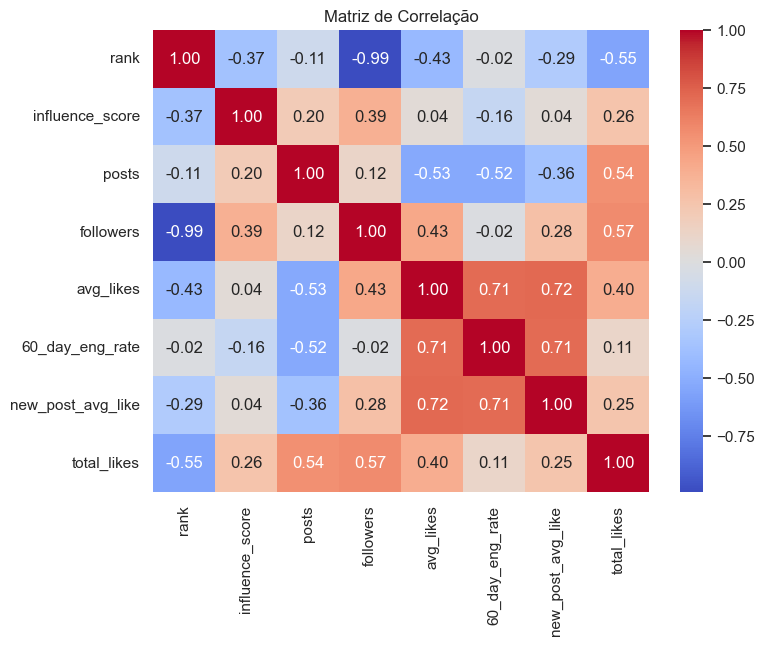

In [11]:
# Calcula a matriz de correlação
correlation_matrix = dataset_no_str.corr()

# Mostra a matriz de correlação
print(correlation_matrix)

# Plota a matriz de correlação como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

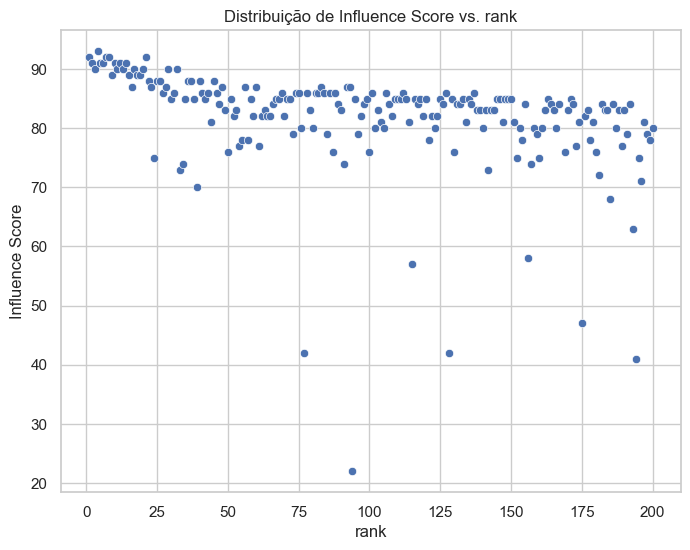

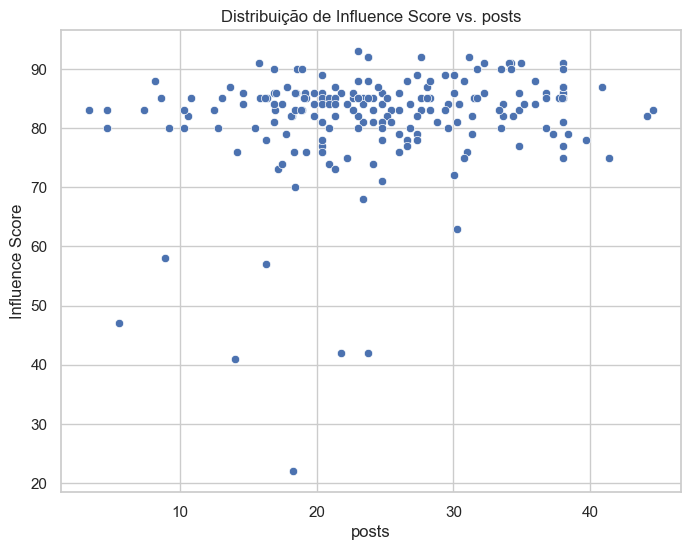

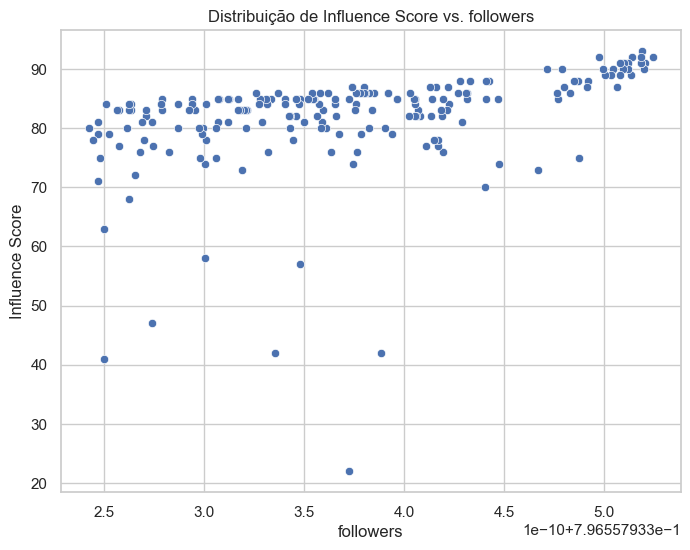

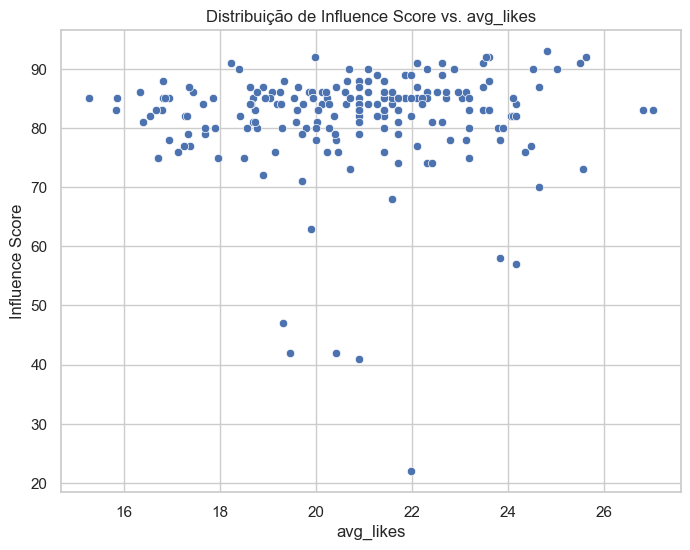

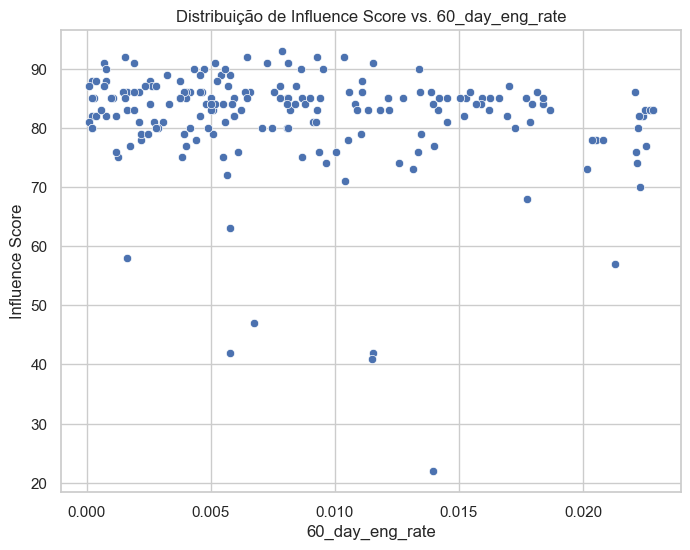

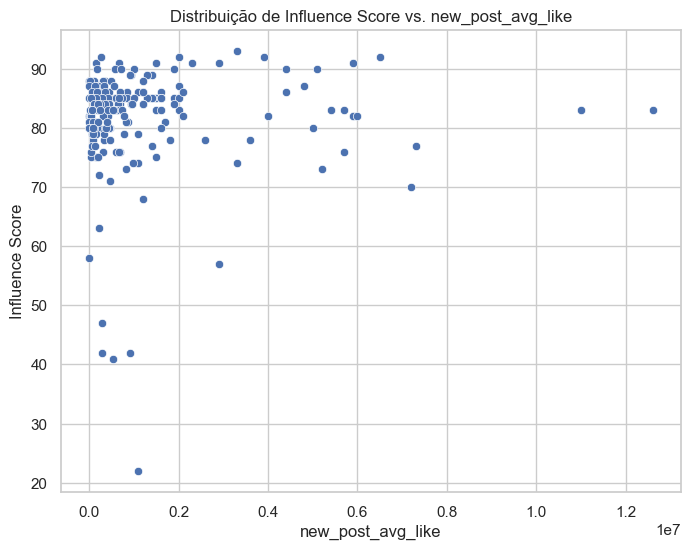

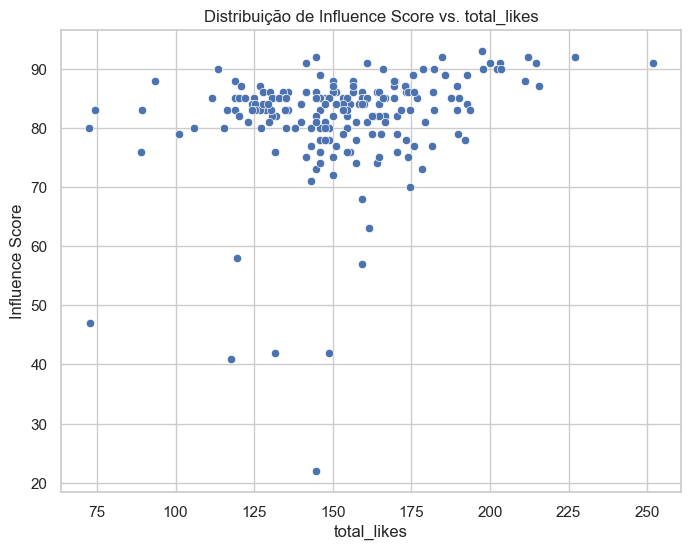

In [12]:
# Iterar pelas colunas numéricas, exceto 'influence_score'
for column in dataset_no_str.columns:
    if column != 'influence_score':
        # Criar o scatter plot
        plt.figure(figsize=(8, 6))  # Ajustar tamanho da figura
        sns.scatterplot(x=column, y='influence_score', data=dataset_no_str)
        plt.title(f'Distribuição de Influence Score vs. {column}')
        plt.xlabel(column)
        plt.ylabel('Influence Score')
        plt.show()

## 🗂️ Divisão do Dataset

Agora vamos dividir o dataset em um conjunto de treinamento e um conjunto de teste. Usaremos 80% dos dados para treinamento e 20% para teste. Antes de dividir, é necessário separar a variável alvo (Y) das demais (X) para realizar o treinamento e, posteriormente, fazer a comparação para testar o modelo.

In [13]:
# Separação das features da variável alvo

X = dataset_no_str.drop('influence_score', axis=1)
y = dataset_no_str['influence_score'] # Variável alvo

# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🚀⚙️ Otimizações e Ajustes

**🔛 1. Normalização dos Dados:**

Normalização (MinMaxScaler): Redimensiona as features para um intervalo específico, geralmente entre 0 e 1.

In [14]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🤖 Treinamendo do Modelo

Com os dados divididos, podemos treinar o modelo de regressão linear.

In [15]:
model = LinearRegression()
# Treinando o modelo
model.fit(X_train_scaled, y_train)

LinearRegression()

## 📐 1ª Avaliação do Modelo

In [16]:
y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R²: {r2:.2f}')
print(f'RMSE: {mse ** 0.5:.2f}')
print(f'RMAE: {mae:.2f}')

R²: 0.11
RMSE: 10.57
RMAE: 5.95


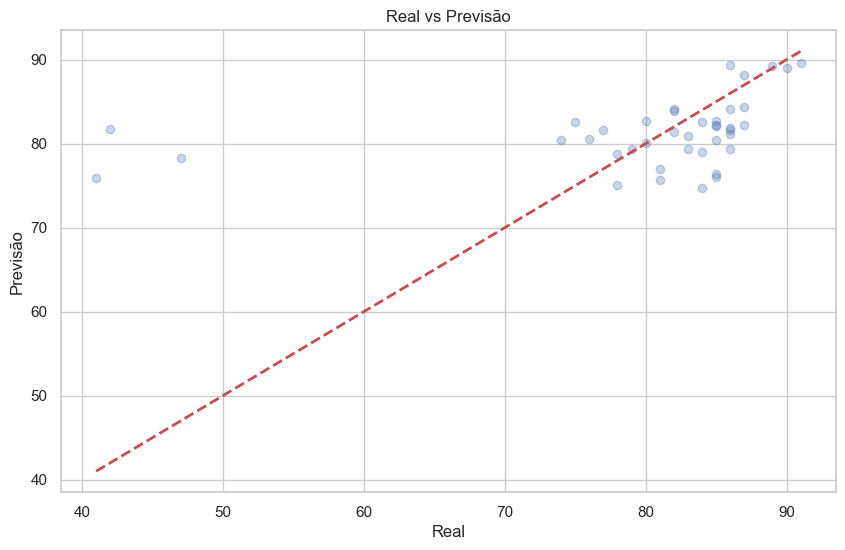

In [17]:
# Visualizar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)  # Cria o gráfico de dispersão
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Adiciona a linha diagonal
plt.xlabel('Real')
plt.ylabel('Previsão')
plt.title('Real vs Previsão')
plt.show()

**🔛 2. Algoritmo de Otimização:** 
- Gradiente Descendente
- Regularização
- Ajuste de Hiperparâmetros

In [18]:
modelSGDR = SGDRegressor(loss="squared_error",  # Função de custo (MSE)
                    alpha=0.01,         # Taxa de aprendizado (regularização)
                    penalty="elasticnet",      # Tipo de regularização
                    max_iter=2000,       # Número máximo de iterações
                    tol=1e-3,             # Tolerância para parada
                    random_state=42)

modelSGDR.fit(X_train_scaled, y_train)

SGDRegressor(alpha=0.01, max_iter=2000, penalty='elasticnet', random_state=42)

## 📐 2ª Avaliação do Modelo

In [19]:
y_pred_SGDR = modelSGDR.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred_SGDR)
mse = mean_squared_error(y_test, y_pred_SGDR)
mae = mean_absolute_error(y_test, y_pred_SGDR)

print(f'R²: {r2:.2f}')
print(f'RMSE: {mse ** 0.5:.2f}')
print(f'RMAE: {mae:.2f}')

R²: 0.17
RMSE: 10.24
RMAE: 5.74


No modelo SGDRegressor foram testadas alguns valores de taxa de aprendizado e tipo de regularização:

alpha = 0.001

alpha = 0.01

alpha = 0.02

alpha = 0.05

alpha = 0.1

alpha = 0.3

---

penalty = "L1" (Lasso)

penalty = "L2" (Ridge)

penalty = "elasticnet"

---


**Melhor taxa de aprendizado** -> **0.01**

**Melhor tipo de regularização** -> **elasticnet** (equilibrio entre Lasso e Ridge)

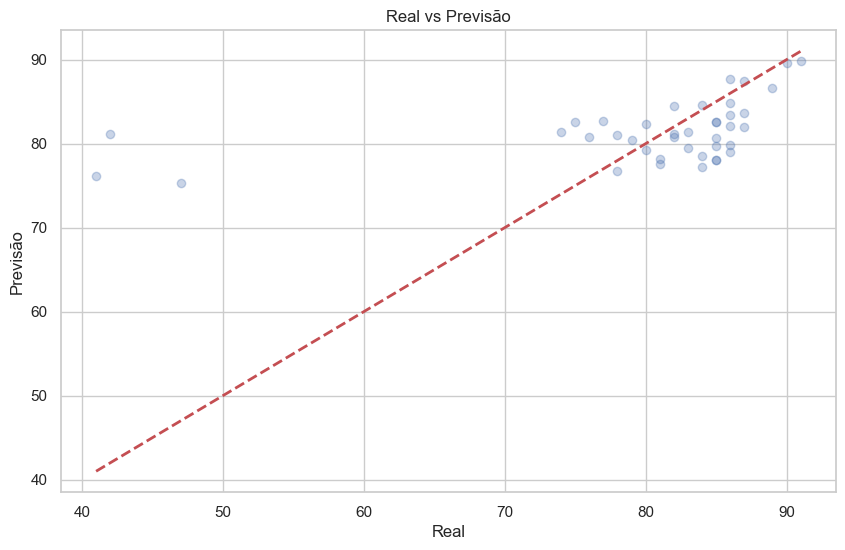

In [20]:
# Visualizar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_SGDR, alpha=0.3)  # Cria o gráfico de dispersão
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Adiciona a linha diagonal
plt.xlabel('Real')
plt.ylabel('Previsão')
plt.title('Real vs Previsão')
plt.show()

**🔛 3. Validação Cruzada**

In [21]:
scores = cross_val_score(model, X_train_scaled, y_train, cv=4, scoring='r2')

## 📐 3ª Avaliação do Modelo

In [22]:
print(f"Pontuações R² da validação cruzada: {scores}")
print(f"R² médio: {scores.mean():.2f}")

Pontuações R² da validação cruzada: [0.02000218 0.18848387 0.06923965 0.23876245]
R² médio: 0.13


## 🔎 Análise e Interpretação das métricas


Os resultados encontrados (no melhor caso após uso do gradiente descedente e ajuste de hiperparametros), 

R²: 0.17, 

RMSE: 10.24, 

MAE: 5.74, 

indicam que o modelo de regressão múltipla, mesmo com as otimizações ainda apresenta um desempenho limitado para este conjunto de dados.

---

🔎 O R² representa a proporção da variância na variável dependente que é explicada pelas variáveis independentes do modelo. Um R² de 0.17 indica que o modelo está explicando apenas 17% da variabilidade em influence_score, o que é considerado baixo. Isso significa que grande parte da variação na pontuação de influência não está sendo capturada pelo modelo.

---

🔎 O RMSE e o MAE medem a magnitude dos erros de previsão do modelo. Valores altos indicam que o modelo está cometendo erros consideráveis na previsão da pontuação de influência. Nesse caso, um RMSE de 10.24 e um MAE de 5.74 sugerem que, em média, as previsões do modelo estão erradas em cerca de 10.24 e 5.74 pontos, respectivamente.

---

⚠️ A conclusão que chegamos é que não há uma relação linear clara entre a variável dependente e as variáveis independentes. Dessa forma, o modelo está encontrando dificuldades em se ajustar aos dados. Talvez experimentar outros modelos não lineares ou modelos basedos em árvores podem capturar melhor as relações.

⚠️ Outro ponto observado é que mesmo como o tratamento de outliers, sem removê-los para não comprometer o dataset, ao traçar os boxplots percebe-se que ainda há pontos que ficam fora das margens. Isso se dá pelo fato de que os dados tem uma grande diferença nas escalas e, embora essa diferença seja representativa, já que retratam a realidade dos dados, o modelo entende como outliers impactando na regressão linear.


### 📉 Outros Gráficos para Análise do Desempenho

#### 1. Distribuição dos Erros de Previsão:

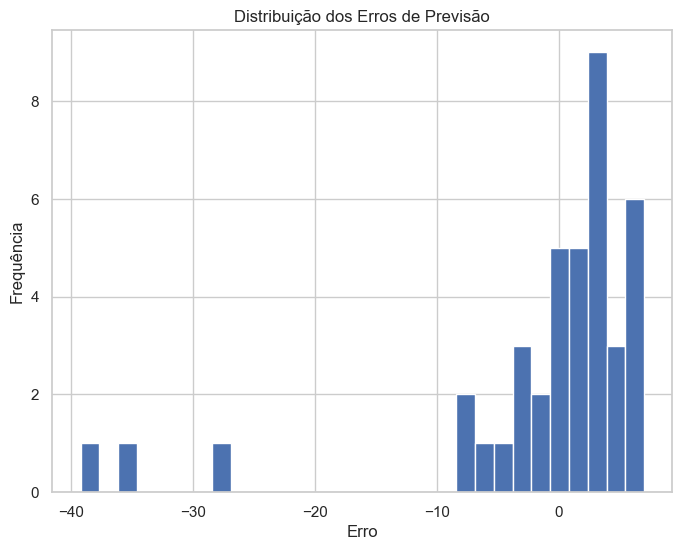

In [23]:
# Calcula os erros de previsão
errors = y_test - y_pred_SGDR  

# Plota o histograma dos erros
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30)  
plt.title('Distribuição dos Erros de Previsão')
plt.xlabel('Erro')
plt.ylabel('Frequência')
plt.show()

🟥 A distribuição de erros vs. previsões apresenta uma dispersão considerável dos pontos em torno de zero, indicando que o modelo não está capturando bem a relação entre as variáveis e que as previsões estão sujeitas a erros significativos.

#### 2. Gráfico de Resíduos:

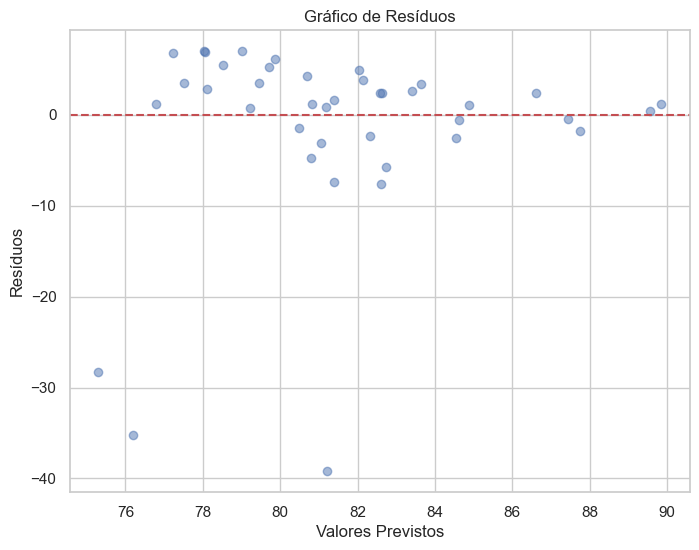

In [24]:
# Plote o gráfico de resíduos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_SGDR, errors, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Adiciona uma linha horizontal em y=0
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()

⚠️ Os resíduos aleatoriamente dispersos em torno da linha horizontal em y=0,é um bom sinal, indicando que o modelo até que estão se ajustando a partes aos dados. Entretanto, há pontos que se distanciam muito dos outros resíduos, o que indicam ainda presença de outliers.